In [5]:
import pandas as pd
import pandasql as psql
import time
import math
import os
import role_classification_functions as rcf
pd.options.display.max_columns = None

fname=os.getcwd()+'\\database'+'\\Souporsecret_4_2.csv'
df_soup=pd.read_csv(fname)
df_soup1=df_soup[(df_soup['queue'] != '5v5 ARAM games') & (df_soup['queue'] != 'URF games') ]
df_soup2=rcf.new_lane_classification(df_soup1,cleaning=True)
print(rcf.score_error(df_soup2))
df=df_soup2[df_soup2['role_error_flag'] == False].copy()
print(rcf.score_error(df))
print(len(df))
df.head(3)

4
0


,minute,participantId,totalGold,level,xp,minionsKilled,jungleMinionsKilled,gameId,queue,teamId,win,champion_name,role,lane,summonerName,pos_x,pos_y,spell0,spell1,item0,item1,item2,item3,item4,item5,pos_lane,jungle_flag,support_flag,final_role,role_error_flag
0,0,7,500,1,0,0,0,3849016581,5v5 Draft Pick games,Red,False,Darius,SOLO,TOP,Boss 0f This Gym,14180,14271,Flash,Teleport,Thornmail,Stridebreaker,Plated Steelcaps,Sterak's Gage,Dead Man's Plate,Caulfield's Warhammer,TOP,False,False,TOP,False
1,1,7,500,1,0,0,0,3849016581,5v5 Draft Pick games,Red,False,Darius,SOLO,TOP,Boss 0f This Gym,6767,11479,Flash,Teleport,Thornmail,Stridebreaker,Plated Steelcaps,Sterak's Gage,Dead Man's Plate,Caulfield's Warhammer,TOP,False,False,TOP,False
2,2,7,584,1,181,3,0,3849016581,5v5 Draft Pick games,Red,False,Darius,SOLO,TOP,Boss 0f This Gym,2170,12608,Flash,Teleport,Thornmail,Stridebreaker,Plated Steelcaps,Sterak's Gage,Dead Man's Plate,Caulfield's Warhammer,TOP,False,False,TOP,False


In [4]:
# x=df[['gameId','teamId','champion_name','role','lane','final_role']].drop_duplicates()
# x.to_csv("checkme.csv")

In [119]:
''' @Params
    df = name of dataframe
    name = summoner name to mark
    Returns dataframe with column homeTeam, which is True if the team contains the entered summoner name. name is not case sensitive
'''
def mark_summoner(df, name):
    name_lower = name.lower()
    df['sn']=df['summonerName'].str.lower()
    df_1 = df[['gameId','summonerName','teamId']].copy().drop_duplicates()
    df_2=df_1[df_1['summonerName']==name_lower].copy()
    df_2['homeTeam'] = [True for i in range(len(df_2))]
    #df_2.drop(['summonerName'],inplace=True)

    df_3=df.merge(df_2[['gameId','teamId','homeTeam']],how='left',on=['gameId','teamId'])
    df_3.fillna(False,inplace=True)
    return df_3

In [136]:
''' @Params
    df = name of dataframe
    name = summoner name **NOT USED YET
    minutes = time  to see gold diff
    ROLE = position: BOT_CARRY, SUPPORT, MIDDLE, JUNGLE, TOP
'''
def gold_diff_x(df, name, minutes=[10], role="BOT_CARRY"):
    minute=str(time)
    df_1=mark_summoner(df,name)
    df_2=df_1[df_1['minute'].isin(minutes)]
    prep=df_2[['gameId','minute','homeTeam','summonerName','champion_name','totalGold','minionsKilled','final_role']].copy()
    
    home=prep[(prep['summonerName']==name.lower()) & (prep['homeTeam']==True) & (prep['final_role']==role)].copy()
    away=prep[ (prep['homeTeam']==False) & (prep['final_role']==role) ].copy()
    df_versus=home.merge(away, on = ["gameId","minute"])

    return df_versus

231.14893617021278

In [182]:
df_test_10=gold_diff_x(df,"Aerialblast",minutes=[10])
df_test_10['gold_diff']=df_test_10['totalGold_x'] - df_test_10['totalGold_y'] 
kev_adc_gold_10 = df_test_10['gold_diff']
print(len(kev_adc_gold_10))

df_test_15=gold_diff_x(df,"Aerialblast",minutes=[15])
df_test_15['gold_diff']=df_test_15['totalGold_x'] - df_test_15['totalGold_y'] 
kev_adc_gold_15 = df_test_15['gold_diff']
print(len(kev_adc_gold_15))

47
47


47  games, 
231 avg gold diff


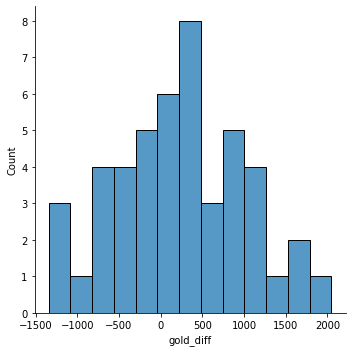

In [183]:
#import seaborn as sns
sns.displot(kev_adc_gold_10, bins =13)
print(len(kev_adc_gold_10), " games, ")
print(int(kev_adc_gold_10.mean()), "avg gold diff")

47  games, 
510 avg gold diff


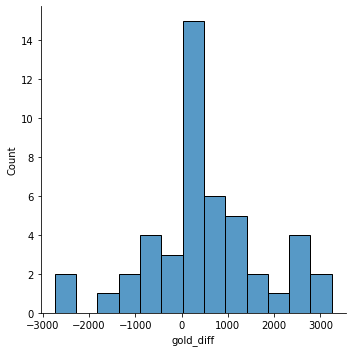

In [184]:
sns.displot(kev_adc_gold_15, bins = 13)
print(len(kev_adc_gold_15), " games, ")
print(int(kev_adc_gold_15.mean()), "avg gold diff")

In [185]:
df_test_10_m=gold_diff_x(df,"Souporsecret",minutes=[10],role="SUPPORT")
df_test_10_m['gold_diff']=df_test_10_m['totalGold_x'] - df_test_10_m['totalGold_y'] 

m_supp_gold_10 = df_test_10_m['gold_diff']
print(len(m_supp_gold_10))
df_test_15_m=gold_diff_x(df,"Souporsecret",minutes=[15],role="SUPPORT")
df_test_15_m['gold_diff']=df_test_15_m['totalGold_x'] - df_test_15_m['totalGold_y'] 

m_supp_gold_15 = df_test_15_m['gold_diff']
print(len(m_supp_gold_15))
df_test_10_m

62
62


,gameId,minute,homeTeam_x,summonerName_x,champion_name_x,totalGold_x,minionsKilled_x,final_role_x,homeTeam_y,summonerName_y,champion_name_y,totalGold_y,minionsKilled_y,final_role_y,gold_diff
0,3849016581,10,True,souporsecret,Thresh,2062,14,SUPPORT,False,thankstothebay,Nami,2779,0,SUPPORT,-717
1,3847601269,10,True,souporsecret,Alistar,1870,9,SUPPORT,False,ethidium bromide,Blitzcrank,2441,13,SUPPORT,-571
2,3847507333,10,True,souporsecret,Zyra,2815,6,SUPPORT,False,atui,Warwick,1982,14,SUPPORT,833
3,3844648489,10,True,souporsecret,Leona,2857,16,SUPPORT,False,luoj bu wan adc,Senna,2395,12,SUPPORT,462
4,3844663230,10,True,souporsecret,Zyra,3165,7,SUPPORT,False,c9zed,Rell,1933,8,SUPPORT,1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3775995746,10,True,souporsecret,Seraphine,2883,6,SUPPORT,False,good buddy coco,Nautilus,1985,12,SUPPORT,898
58,3775949746,10,True,souporsecret,Thresh,3065,11,SUPPORT,False,nob1e,Maokai,2236,10,SUPPORT,829
59,3766805551,10,True,souporsecret,Seraphine,3671,10,SUPPORT,False,noca toca,Sett,2288,15,SUPPORT,1383
60,3766810793,10,True,souporsecret,Leona,1955,12,SUPPORT,False,kanna kamuı,Nautilus,1969,13,SUPPORT,-14


62  games, 
140 avg gold diff


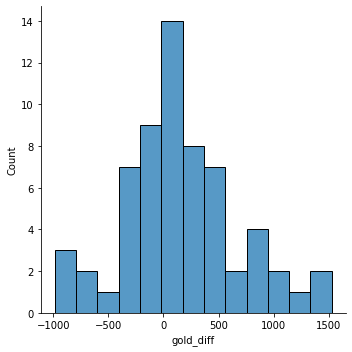

In [186]:
sns.displot(m_supp_gold_10, bins = 13)
print(len(m_supp_gold_10), " games, ")
print(int(m_supp_gold_10.mean()), "avg gold diff")

62  games, 
323 avg gold diff


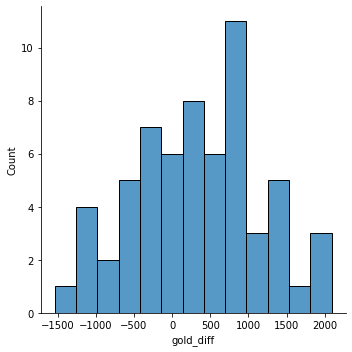

In [187]:
sns.displot(m_supp_gold_15, bins = 13)
print(len(m_supp_gold_15), " games, ")
print(int(m_supp_gold_15.mean()), "avg gold diff")